## Youtube video link: https://www.youtube.com/watch?v=w54b0Z9HvUA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
import os
os.getcwd()
os.chdir('..')


In [3]:
os.getcwd()

'C:\\Users\\Prabal Kuinkel\\Desktop\\Data Analyst\\100-Days-of-ML'

In [4]:
df = pd.read_csv('Data-sets\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [6]:
#Converting the Month into datetime
df['Month']=pd.to_datetime(df['Month'])

In [7]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [8]:
df.head(3)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132


In [9]:
df.index

RangeIndex(start=0, stop=144, step=1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='#Passengers'>

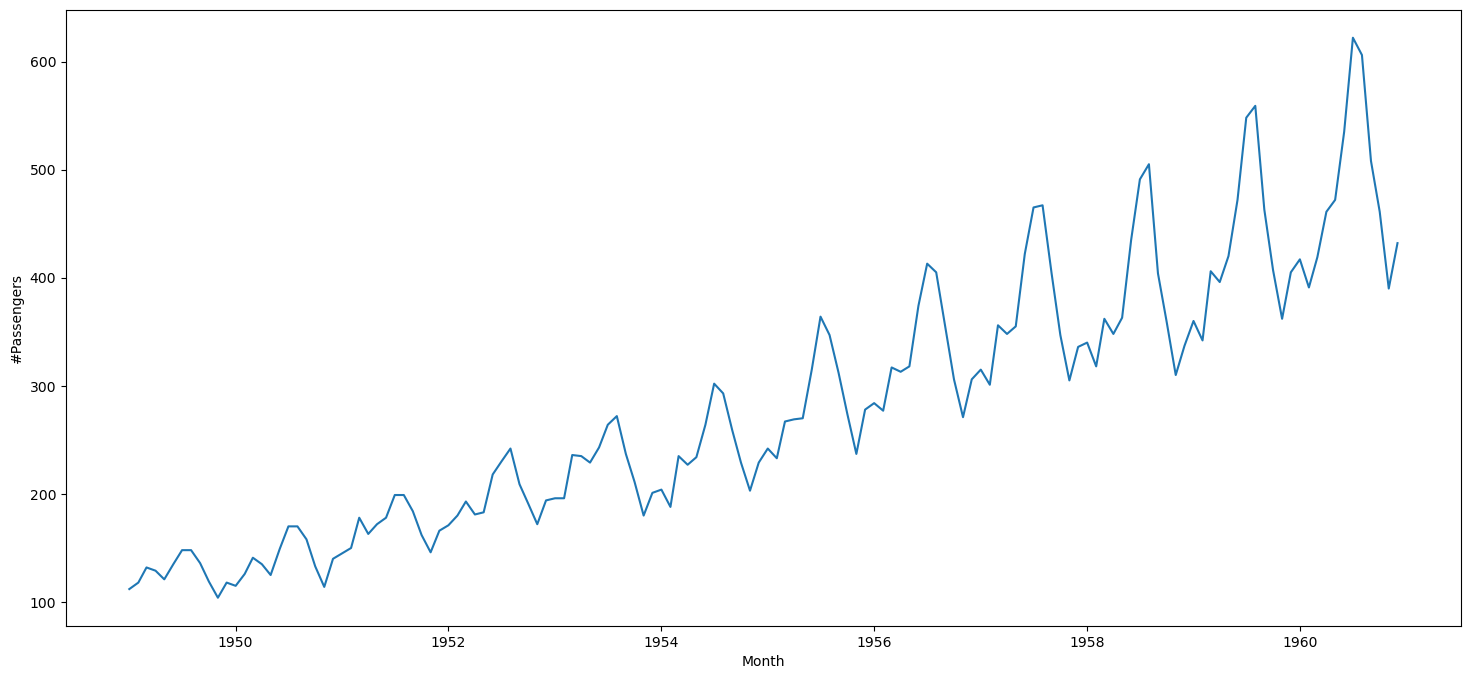

In [10]:
plt.figure(figsize=(18,8))
sns.lineplot(data=df,x='Month',y='#Passengers')

### In the above line plot we can observe that there is Trend(Increasing) component and also the seasonality component (since the patterns / spikes are visible after certain fixed interval of time)

# Now we check if the Time-Series is stationary or not

## Technique-1 Using self observation/Summary Statistics ---->>> This technique may be misleading to human eyes

In this technique we divide the entire data sets into multiple dataframe(2 or more with equal datapoints) and we calculate
the mean, variance of all the dataframe .Then we compare the mean and varaince of all the data frame and see how much are they being deviated .Incase of high deviation we can say that in preliminary check for stationarity that the Time-series data is not stationary  

In [11]:
# we are extracting the values of '#Passenger' Column dividing into 2 equal halves and calculating the mean 
# and varaince of both halves to check if there is high deviation/Fluctaution .

from pandas import read_csv
#series = read_csv('international-airline-passengers.csv', header=0, index_col=0)
X_new = df['#Passengers'].values
split = len(X_new) / 2
X1, X2 = X_new[0:int(split)], X_new[int(split):]
mean1 =X1.mean()
mean2 = X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='#Passengers', ylabel='Count'>

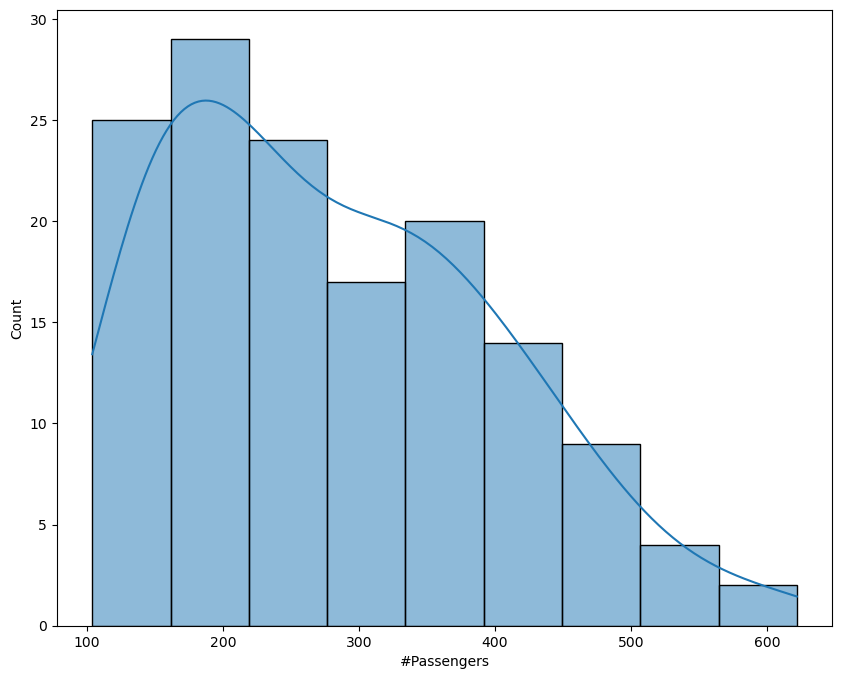

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(data=df,x='#Passengers',kde=True)

1) Values not looking like Gaussian, therefore mean & variance values are less meaningful
2) Since there is high fluctuation in mean and variance so for perliminary test we can say that the data is stationary

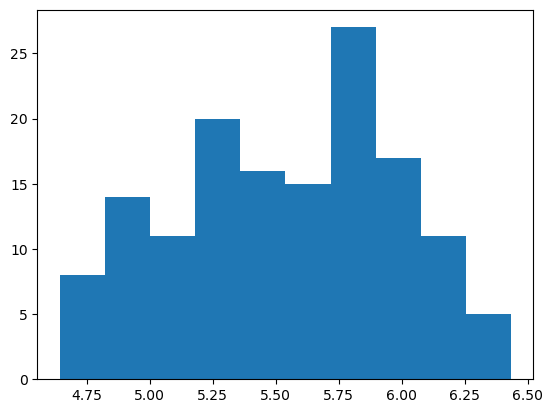

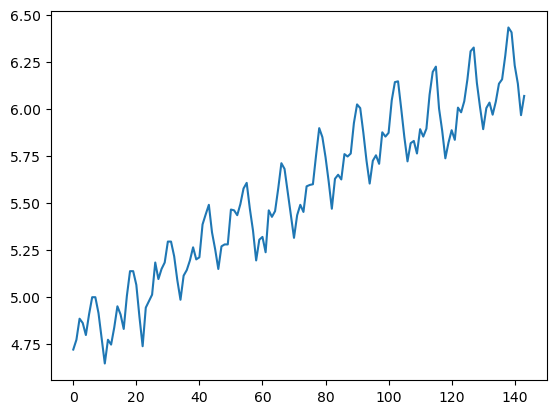

In [13]:
# A log transform can be used to flatten out exponential change back to a linear relationship.
from numpy import log
X_log = log(df['#Passengers'].values)
pyplot.hist(X_log)
pyplot.show()
pyplot.plot(X_log)
pyplot.show()

# Technique-2 STATISTICAL TEST


## Using Angumented Dickey Fuller Test

In [14]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC",maxlag=0)
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [15]:
df.set_index('Month', inplace=True)  #Set Month(i.e 'time' column) as the Index (Optional but Common for Time Series):

In [16]:
adf_test(df)


Results of Dickey-Fuller Test:
Test Statistic                  -1.748093
p-value                          0.406519
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


### Interpretation:
Null Hypothesis (H₀): The time series is non-stationary (it has a unit root).

Alternative Hypothesis (H₁): The time series is stationary.
### Key Points:
The test statistic (-1.748093) is greater than all the critical values at the 1%, 5%, and 10% significance levels.

The p-value (0.406519) is greater than common significance levels like 0.01, 0.05, and 0.1

### Based on the results(Conclusion)

p-value (0.406519) is much greater than 0.05 (or any typical threshold like 0.01 or 0.1).

Conclusion: Fail to reject the null hypothesis; the time series is likely non-stationary.

The test statistic (-1.748093) is greater than all critical values (-3.476927, -2.881973,  -2.577665).

Conclusion: The test statistic does not provide evidence against the null hypothesis. The time series is not stationary .


# Making the time series stationary using the log transformation

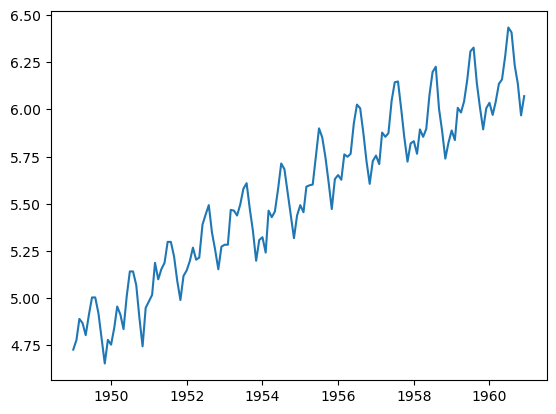

In [17]:
# Applying log transform
df_log = np.log(df + 1)  # ensure that the dataset (df) does not contain zeros or negative values before applying np.log, as the logarithm of these values will result in errors or NaN.
plt.plot(df_log)

In [18]:
#Dickery fuller test after applying log transform
adf_test(df_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.814264
p-value                          0.373403
#Lags Used                       0.000000
Number of Observations Used    143.000000
Critical Value (1%)             -3.476927
Critical Value (5%)             -2.881973
Critical Value (10%)            -2.577665
dtype: float64


### After applying the log transformation, the results of the Augmented Dickey-Fuller (ADF) test remain similar to the previous results:

### Interpretation:

The test statistic (-1.816050) is still greater than all the critical values at the 1%, 5%, and 10% significance levels.

The p-value (0.372523) is still greater than the common significance levels (0.01, 0.05, and 0.10).

### Conclusion:
Since the test statistic remains above the critical values and the p-value is still high, we fail to reject the null hypothesis (H₀) again.

This means the series is still non-stationary even after applying a log transformation.

### Next Steps:
Since the log transformation didn't make the data stationary, we might want to try other techniques such as:

Differencing: Subtracting the previous observation from the current observation (e.g., first-order differencing).

Seasonal differencing: If seasonality is present in the data, try applying seasonal differencing.

Detrending: Removing trend components explicitly.



# Smoothing and Differencing (to remove trend and seasonality and make time series stationary)

In [19]:
#Smoothing(Moving Average)
moving_avg = pd.Series(df_log['#Passengers']).rolling(window=12).mean()
## Here we have taken rolling mean of window size 12 .
# It means that suppose there are 100 time series data in the data set . For the first 12 time-series data we keep the original data.then for 13th data we take the mean of first 12 data set and this mean will be the new value of 13th time series and the rolling windo continues ofr all other data set and the first 12th databwill be null .


In [20]:
moving_avg.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01    4.844127
1950-01-01    4.846310
1950-02-01    4.851732
1950-03-01    4.857189
Name: #Passengers, dtype: float64

Purpose: The goal of smoothing is to remove the trend component from the data. You use a moving average with a window size of 12 (months) to capture the underlying seasonal pattern and smooth out short-term fluctuations.

Rolling window: This method calculates the mean of the data over a window of 12 periods (12 months, in your case). By using this rolling average, you essentially smooth out fluctuations over each 12-month period, which helps remove long-term trends.

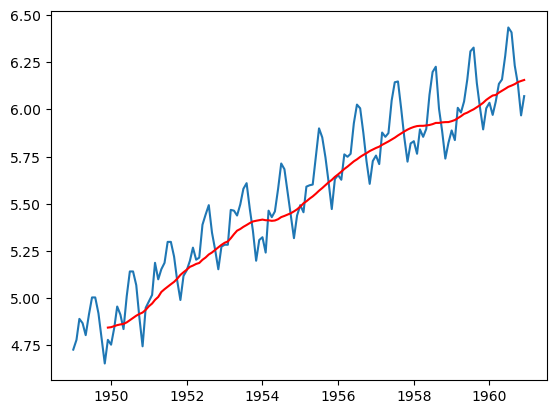

In [21]:
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [22]:
# Differencing the data to remove seasonality:
df_log_moving_avg_diff = df_log['#Passengers'] - moving_avg
df_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065003
Name: #Passengers, dtype: float64

Purpose: After smoothing, you subtract the moving average from the original log-transformed data. This step is called differencing, which helps remove any remaining trend or seasonality in the series.

By differencing, you essentially remove the seasonal effect captured by the moving average, leaving behind only the noise and the irregular component. This should make the series more stationary.

In [23]:
# Dropping NaN values:
df_log_moving_avg_diff.dropna(inplace=True)
df_log_moving_avg_diff.head(5)

Month
1949-12-01   -0.065003
1950-01-01   -0.092720
1950-02-01   -0.007545
1950-03-01    0.098638
1950-04-01    0.051706
Name: #Passengers, dtype: float64

# Is this technique(log transform,Smoothing and Differencing) correct?
Yes, this is a valid technique to make a time series stationary. Here's why:

Log transformation reduces variance and stabilizes the mean, making it easier to detect and model trends.

Smoothing (moving average) helps capture seasonality and remove long-term trends.

Differencing (subtracting the moving average) helps remove remaining seasonality or trends that were not captured by the initial transformation.

In [24]:
#TEST STATIONARITY AGAIN
adf_test(df_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -4.905678
p-value                          0.000034
#Lags Used                       0.000000
Number of Observations Used    132.000000
Critical Value (1%)             -3.480888
Critical Value (5%)             -2.883697
Critical Value (10%)            -2.578586
dtype: float64


### Conclusion
The Test Statistic (-4.907410) is less than(i.e more negative) than the critical values at all confidence levels (1%, 5%, and 10%), and the p-value (0.000034) is well below 0.05.

Interpretation: The null hypothesis (that the series is non-stationary) is rejected. This strongly suggests that the series is stationary after your transformation and smoothing process.

### Hence Time-series is stationary now

In [25]:
df_log_moving_avg_diff

Month
1949-12-01   -0.065003
1950-01-01   -0.092720
1950-02-01   -0.007545
1950-03-01    0.098638
1950-04-01    0.051706
                ...   
1960-08-01    0.281798
1960-09-01    0.098003
1960-10-01   -0.009238
1960-11-01   -0.182288
1960-12-01   -0.085623
Name: #Passengers, Length: 133, dtype: float64

# Decomposition

1) Decomposition refers to the process of breaking down a time series into its individual components(trends,seasonality,residual) to better understand the underlying patterns.

2) Decomposition is applied to the original time series(before any transformation like differencing or smoothing)

OR

we can also apply decomposition on the log-transformed time series (e.g., df_log['#Passengers']). Since The log transformation doesn't fundamentally alter the components; it just makes the data more manageable.


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply decomposition on log-transformed time series data
decomposition = seasonal_decompose(df_log, model='multiplicative', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


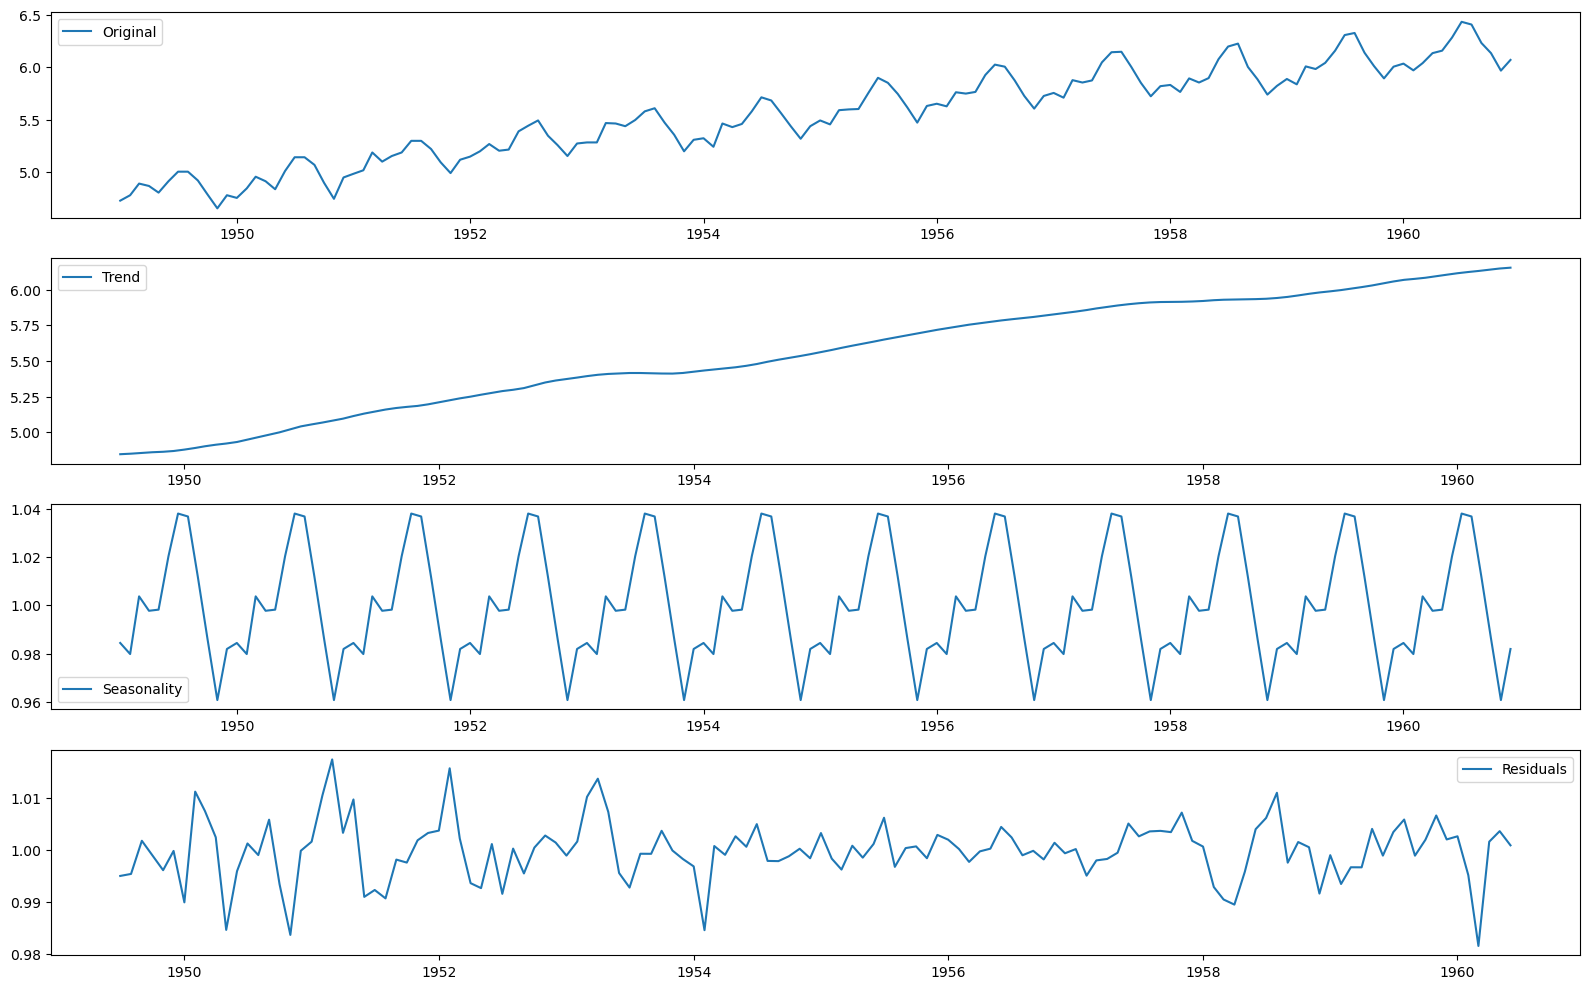

In [27]:
plt.rcParams['figure.figsize'] = (16, 10)  # Width and height of below images
plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## We can observe in the above image that the trend is increasing and there is seasonality and residual in time series

In [28]:
# Creating a dataframe of the residual(i.e residual are the leftout part after the trend and seasonality paramater). Removing the null values and then performing the dickey fuller test
df_log_decompose_residual = residual
df_log_decompose_residual.dropna(inplace=True)
adf_test(df_log_decompose_residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.279785e+00
p-value                        4.552467e-13
#Lags Used                     0.000000e+00
Number of Observations Used    1.310000e+02
Critical Value (1%)           -3.481282e+00
Critical Value (5%)           -2.883868e+00
Critical Value (10%)          -2.578677e+00
dtype: float64


## Residual data is expected to be stationary because trend and seasonality are removed . Also the above result dickey fuller test on the residual data states that the residual data is stationary

In [29]:
df_log_moving_avg_diff

Month
1949-12-01   -0.065003
1950-01-01   -0.092720
1950-02-01   -0.007545
1950-03-01    0.098638
1950-04-01    0.051706
                ...   
1960-08-01    0.281798
1960-09-01    0.098003
1960-10-01   -0.009238
1960-11-01   -0.182288
1960-12-01   -0.085623
Name: #Passengers, Length: 133, dtype: float64

# Final-Forecasting

In [30]:
from statsmodels.tsa.arima.model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

In [31]:
lag_acf = acf(df_log_moving_avg_diff, nlags=20)
lag_pacf = pacf(df_log_moving_avg_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

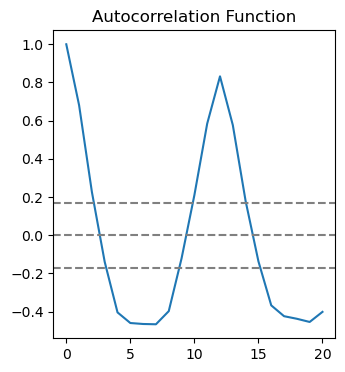

In [32]:
#Plot ACF:  
plt.rcParams['figure.figsize'] = (8, 4)  # Width and height of below images

plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

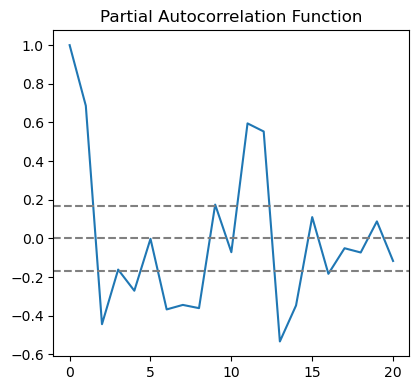

In [33]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [34]:
X=df_log_moving_avg_diff.values  # Since 'df_log_moving_avg_diff' time series is stationary
#Train test split
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]

In [35]:
#MODEL BUILDING
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [36]:
history = [x for x in train]
predictions = list()
#test.reset_index()

# 
To identify the best combination of (p,d,q), please run the last part of this code (Grid Search


In [37]:
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(2,0,3))   #(p,d,q) values , obtained after grid search cv (Grid search code is at last )
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print(f'Test RMSE: {rmse:.3f}')


predicted=0.148304, expected=0.033593
predicted=0.081904, expected=0.044307
predicted=0.175636, expected=0.206712
predicted=0.238710, expected=0.293665
predicted=0.225846, expected=0.286105
predicted=0.162404, expected=0.130777
predicted=0.013068, expected=-0.031354
predicted=-0.072294, expected=-0.169786
predicted=-0.139688, expected=-0.081058
predicted=-0.046410, expected=-0.075603
predicted=-0.069399, expected=-0.146859
predicted=0.004417, expected=-0.019036
predicted=0.108337, expected=-0.058367
predicted=0.063160, expected=-0.018137
predicted=0.176872, expected=0.159829
predicted=0.238623, expected=0.276141
predicted=0.245341, expected=0.297694
predicted=0.180181, expected=0.075044
predicted=-0.044533, expected=-0.045564
predicted=-0.055931, expected=-0.193226
predicted=-0.110700, expected=-0.110220
predicted=-0.059136, expected=-0.049137
predicted=-0.073529, expected=-0.106330
predicted=-0.037023, expected=0.055219
predicted=0.135856, expected=0.019603
predicted=0.068302, expecte

In [56]:
# Forecasting for the next 30 days
forecast_steps = 30
future_forecast = []
for _ in range(forecast_steps):
    model = ARIMA(history, order=(2, 0, 3))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    future_forecast.append(yhat)
    history.append(yhat)

In [57]:
# Inverse Transformations:
# 1. Reverse Differencing
last_rolling_avg = moving_avg.iloc[-1]  # The last rolling average value
reversed_diff = [future_forecast[0] + last_rolling_avg]
for i in range(1, len(future_forecast)):
    reversed_diff.append(future_forecast[i] + reversed_diff[i - 1])

# 2. Reverse Log Transformation
original_scale_forecast = np.exp(reversed_diff) - 1  # Subtract 1 to reverse the earlier log(df + 1)

# Combine with future dates
last_date = df.index[-1]  # Assuming the DataFrame index is datetime
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, forecast_steps + 1)]
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Passengers": original_scale_forecast
})

print(forecast_df)

         Date  Predicted Passengers
0  1960-12-02            460.875425
1  1960-12-03            433.011629
2  1960-12-04            425.722365
3  1960-12-05            450.309643
4  1960-12-06            513.407224
5  1960-12-07            616.242169
6  1960-12-08            754.452889
7  1960-12-09            904.912562
8  1960-12-10           1029.567570
9  1960-12-11           1090.841396
10 1960-12-12           1075.106502
11 1960-12-13           1004.369728
12 1960-12-14            918.777409
13 1960-12-15            855.370871
14 1960-12-16            837.199463
15 1960-12-17            877.773934
16 1960-12-18            988.773615
17 1960-12-19           1175.689130
18 1960-12-20           1429.474781
19 1960-12-21           1712.987054
20 1960-12-22           1957.897191
21 1960-12-23           2093.836171
22 1960-12-24           2087.561516
23 1960-12-25           1961.035501
24 1960-12-26           1801.488089
25 1960-12-27           1680.116628
26 1960-12-28           1641

## Checking the errors

In [38]:
#CHECKING ERROR
from math import sqrt
from sklearn.metrics import mean_squared_error

# RMSE for original differenced data
rms_diff = sqrt(mean_squared_error(test, predictions))
print('RMSE (Differenced Data): %.2f' % rms_diff)


RMSE (Differenced Data): 0.07


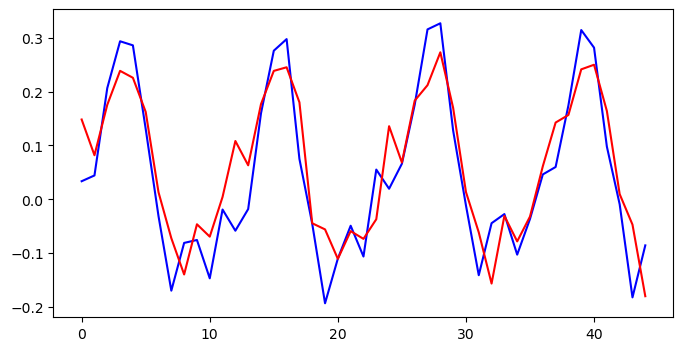

In [39]:
# plot
pyplot.plot(test, color = 'blue', label='test')   
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

In [40]:
# RMSE for original scale (reverse log transformation)
rms_original = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('RMSE (Original Scale): %.2f' % rms_original)

RMSE (Original Scale): 0.07


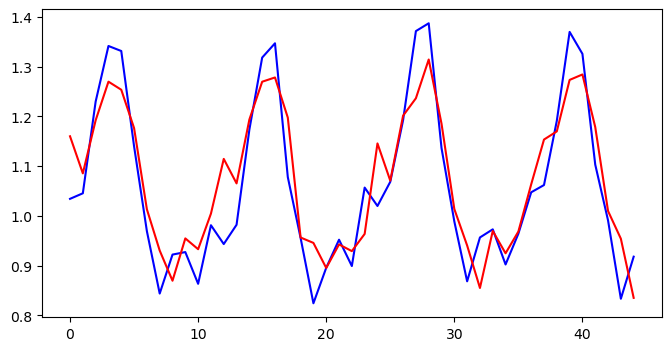

In [41]:
# plot
pyplot.plot(np.exp(test), color = 'blue', label='test')   
pyplot.plot(np.exp(predictions), color='red', label='pred')
pyplot.show()

# Auto Arima

In [42]:
# !pip install pmdarima

In [43]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(
    train, start_p=1, start_q=1, d=1, max_p=4, max_q=4,
    seasonal=False, stationary=True, information_criterion='aic',
    stepwise=True, suppress_warnings=True, error_action='ignore', trace=False
)

In [44]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   88
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 100.241
Date:                Thu, 09 Jan 2025   AIC                           -186.482
Time:                        16:42:05   BIC                           -169.140
Sample:                             0   HQIC                          -179.495
                                 - 88                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0308      0.008      3.641      0.000       0.014       0.047
ar.L1          0.6562      0.147      4.455      0.000       0.367       0.945
ar.L2          0.4517      0.156      2.902      0.004       0.147       0.757
ar.L3         -0.5938      0.103     -5.740      0.000      -0.797      -0.391
ma.L1          0.1456      0.134      1.087      0.277      -0.117       0.408
ma.L2         -0.8059      0.108     -7.448      0.000      -1.018      -0.594
sigma2         0.0058      0.001      4.639      0.000       0.003       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 3.38
Prob(Q):                              0.85   Prob(JB):                         0.18
Heteroskedasticity (H):               0.98   Skew:                             0.08
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## forecasting future Prediction 

In [45]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=30)
prediction_arima_model.columns = ['predicted_sales']

In [46]:
prediction_arima_model

,predicted_sales
0,0.134803
1,0.172638
2,0.166348
3,0.137897
4,0.093919
5,0.055945
6,0.028054
7,0.018715
8,0.022538
9,0.037390


In [47]:
np.exp(prediction_arima_model)  

,predicted_sales
0,1.144312
1,1.188436
2,1.180984
3,1.147858
4,1.098471
5,1.057539
6,1.028452
7,1.018891
8,1.022794
9,1.038097


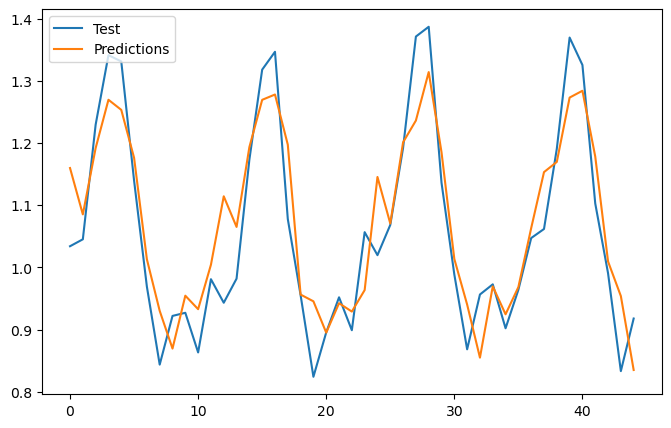

In [48]:
plt.figure(figsize=(8,5))
#plt.plot(train, label='Training')
plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(predictions), label='Predictions')
plt.legend(loc = 'upper left')
plt.show()

# Grid Search

In [49]:
import warnings
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from datetime import datetime


In [50]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        try:
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(test[t])
        except Exception as e:
            print(f"Error for ARIMA{arima_order}: {e}")
            return float("inf")
    # Calculate out-of-sample error
    error = mean_squared_error(test, predictions)
    return error


In [51]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    total_combinations = len(p_values) * len(d_values) * len(q_values)
    combination_count = 0
    for p in p_values:
        for d in d_values:
            for q in q_values:
                combination_count += 1
                order = (p, d, q)
                try:
                    print(f"Evaluating ARIMA{order} ({combination_count}/{total_combinations})")
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print(f"ARIMA{order} MSE={mse:.3f}")
                except:
                    continue
    print(f"Best ARIMA{best_cfg} MSE={best_score:.3f}")


In [52]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [53]:
#############Run this code only once to find the best optimal value of p,d,q ####################

# import datetime
# print(datetime.datetime.now())
# p_values = [1,2,3,4,5]
# d_values = [0,1]
# q_values = [1,2,3]
# warnings.filterwarnings("ignore")
# evaluate_models(train, p_values, d_values, q_values)
# print(datetime.datetime.now())

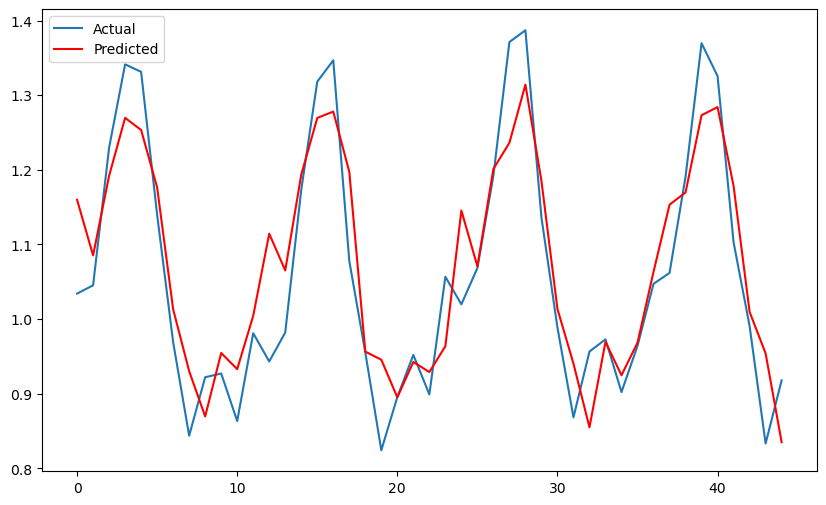

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(np.exp(test), label='Actual')
plt.plot(np.exp(predictions), label='Predicted', color='red')
plt.legend()
plt.show()


In [55]:
predictions

[0.14830431801330352,
 0.0819035243900908,
 0.17563614872605143,
 0.23870997026468754,
 0.22584578115890755,
 0.16240359239346747,
 0.013068401900185843,
 -0.07229369062647883,
 -0.1396880998590029,
 -0.04641025482165172,
 -0.06939916277561119,
 0.0044173218169898665,
 0.10833732658894023,
 0.06316040856668474,
 0.17687184707982923,
 0.2386228332411194,
 0.2453413352230367,
 0.18018149955002513,
 -0.044532890603762594,
 -0.05593059304064059,
 -0.11069954674993204,
 -0.059136233276720546,
 -0.0735287775631402,
 -0.037022738026060056,
 0.13585592048571213,
 0.06830177139012635,
 0.1833360309582398,
 0.2120775697154316,
 0.27317421943150083,
 0.16992143831727027,
 0.0135789919038279,
 -0.06144679781959304,
 -0.1566014595951905,
 -0.030858948749900604,
 -0.07823682674780001,
 -0.032017726967897626,
 0.06138134260748581,
 0.14263291879049234,
 0.1567490529075065,
 0.2414876058505668,
 0.25004364256646666,
 0.16419646533042165,
 0.009635883847724312,
 -0.04702531183455226,
 -0.18009518667307